# Machine Learning: Clustering - K-Means
## 1. Introduction
There are many models for clustering. __k-means__ clustering is a method of vector quantization, originally from signal processing, that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. It is a simmple and popular method for cluster analysis in data mining; especially useful if one needs to quickly discover insights from unlabeled data. __k-means__ clustering minimizes the intra-cluster distances and maximizes the inter-cluster distances. https://en.wikipedia.org/wiki/K-means_clustering

This notebook will present the k-means model from Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Real-world applications of k-means include:
- Customer segmentation
- Understand website visitors & their goals
- Pattern recognition
- Machine learning
- Data compression

This notebook will present k-means clustering with 2 examples:
- k-means on a random generated dataset
- using k-means for customer segmentation

In [1]:
import random 
import numpy as np
import matplotlib as mpl
mpl.rcdefaults()
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

## 2. K-Means CLustering with Random Data
### 2.1 Data Generation
The function below will generate the data points and requires these inputs:
- n_samples: The total number of points equally divided among clusters.
 - value will be: 5000
- centers: The number of centers to generate, or the fixed center locations.
 - alue will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
- cluster_std: The standard deviation of the clusters.
 - value will be: 0.9


Output:
- X: array of shape [n_samples, n_features] a.ka. Feature Matrix
 - the generated samples
- y: array of shape [n_samples] a.k.a. Response Vector
 - the integer labels for cluster membership of each sample


In [2]:
# generate random sample data 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X[0:2])
print(y[0:2])

[[ 2.34125761 -3.87181073]
 [ 0.19521977  0.84636668]]
[2 3]


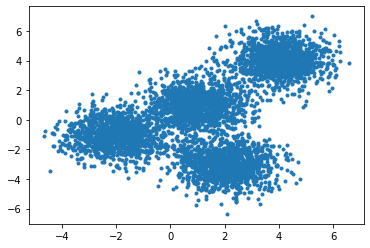

In [3]:
# visualize data in scatter plot
plt.scatter(X[:, 0], X[:, 1], marker='.')

### 2.2 Modelling k-means
The __k-means clustering__ has three essential parameters that need to be determined:
- init: initialization method of the centroids
 - value will be: "k-means++" (or "random")
 - "k-means++" selects initial cluster centers more efficiently (than "random") to speed up convergence
- n_clusters: the number of clusters to find as well as the number of centroids to generate
 - value will be: 4 (since we have 4 centers; but on real-world dataset, it needs to be tested for best results)
- n_init: number of iterations the k-means algorithm will be run with different centroid seeds
 - the final results will be the best output of n_init consecutive runs in terms of inertia
 - value will be: 12

In [4]:
# model k-means algorithm with parameters set above
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [5]:
# fit the KMeans model with the feature matrix X
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# obtain the labels generated by the model
k_means_labels = k_means.labels_
k_means_labels

array([1, 0, 1, ..., 3, 2, 3], dtype=int32)

In [7]:
# obtain the centroid locations
# they should close to [[4, 4], [-2, -1], [2, -3],[1,1]] but may be in different order
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.99149274,  1.01530928],
       [ 2.03284407, -3.03090783],
       [ 3.98938057,  4.04876997],
       [-2.03980187, -1.0434169 ]])

### 2.3 Visualizing k-means Clusters

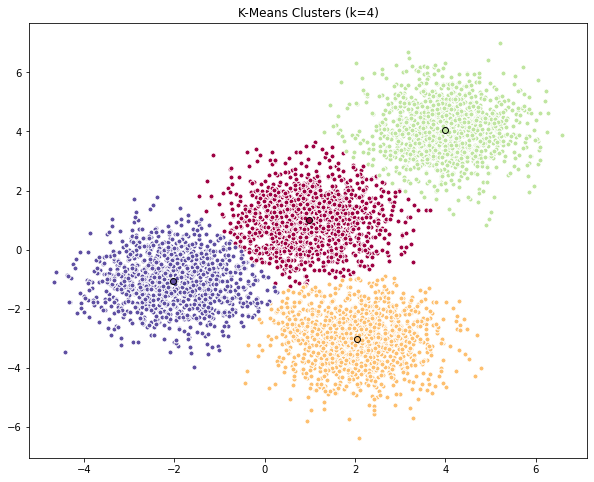

In [8]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 8))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
# Use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are in the cluster (ex. cluster 0) are labeled as true
    # else they are labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('K-Means Clusters (k=4)')
# Show the plot
plt.show()

### 2.4 Experimenting with Centroids
Let's assume the true number of centroids is unknown, build a k-means model for 3 and 5 centroids, and visualize the differences.

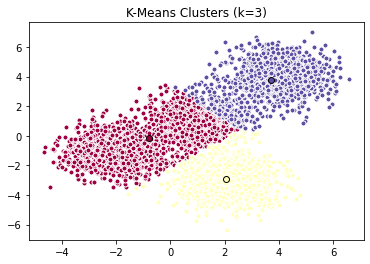

In [9]:
# modelling k-means with 3 centriods 
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('K-Means Clusters (k=3)')
plt.show()

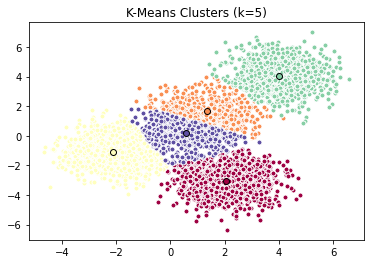

In [10]:
# modelling k-means with 5 centriods 
k_means5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means5.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means5.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means5.cluster_centers_)), colors):
    my_members = (k_means5.labels_ == k)
    cluster_center = k_means5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('K-Means Clusters (k=5)')
plt.show()

## 3. Customer Segmentation with K-Means
### 3.1 The Goal and the Dataset

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing or product-development resources. For example, one group might contain customers who are high-profit and low-risk, i.e. more likely to purchase products, or subscribe for a service. A business goal is to retain those customers.

In [11]:
# obtaining the customer dataset from IBM storage
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
print('Download complete.')

Download complete.


In [12]:
# load the dataset into a Pandas DataFrame 
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### 3.2 Data Cleaning and Pre-Processing
Data Cleaning and Pre-Processing includes all steps that transform the data into a format that legible and processible by the ML algorithm.

In [13]:
# Address is a categorical variable with no values for k-means algorithm
# drop Address
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
# data normalization
# = statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0:2]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677]])

### 3.3 Modelling k-means for Customer Segmentation
Without k-means cluster, customer segmentation would be educated guessing that each customer group would have certain age, income, education, etc., that would put them in similar groups. However, using the k-means clustering, this process is much easier and faster.

In [15]:
# find 3 groups of customers
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels[0:10])

[0 2 0 0 1 2 0 2 0 2]


### 3.4 Insights from k-means Customer Segmentation
k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:
- Group 0:  young-ish & low income
- Group 1:  affluent, educated & middle aged+
- Group 2:  middle income & middle aged

In [16]:
# find the number of customers in each segment
df["Clus_km"] = labels
df["Clus_km"].value_counts()

0    649
2    183
1     18
Name: Clus_km, dtype: int64

In [17]:
# find the mean of attributes that define each segment
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


### 3.5 Visualizing Customer Segments

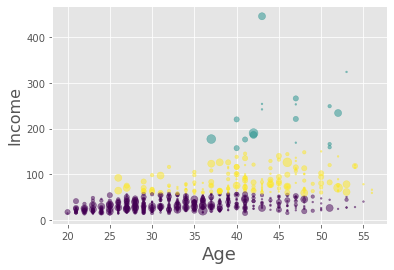

In [18]:
# visualizing 2D
mpl.style.use('ggplot')
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

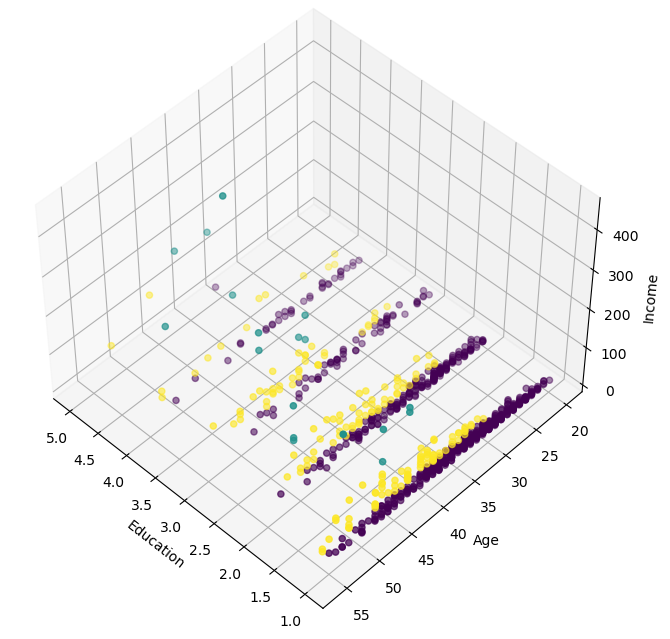

In [19]:
# visualizing 3D
mpl.rcdefaults()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))